In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
len(train)

891

In [4]:
#percentage null values
for i in range(12):
    tnull=train[train.columns[i]].isnull().sum()
    if tnull>0:
        print(train.columns[i],":",(tnull/891)*100)

Age : 19.865319865319865
Cabin : 77.10437710437711
Embarked : 0.22446689113355783


In [5]:
test=pd.read_csv("test.csv")
len(test)

418

In [6]:
#percentage null values
for i in range(11):
    tnull=test[test.columns[i]].isnull().sum()
    if tnull>0:
        print(test.columns[i],":",(tnull/418)*100)

Age : 20.574162679425836
Fare : 0.23923444976076555
Cabin : 78.22966507177034


Planning on dropping cabin, embarked, fare, ticket, sibsp, parch, name.
Fare and class are related; Ticket isn't necessary as an identifier since id exists; Cabin is mostly empty; Embarked doesn't seem that important

Possible issues: family size might play a role if female with children; name might matter for title; embarked may indicate class as locations of where the higher class may have gotten on and the data information says the priority was women, children, and higher class

In [7]:
train2=pd.DataFrame(train)

In [8]:
train2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train2.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [10]:
train2=pd.get_dummies(train2,columns=['Sex'])

In [11]:
meanAge=train2["Age"].mean()
medAge=train2["Age"].median()
print(meanAge,medAge)

29.69911764705882 28.0


In [12]:
train2[:20]

,PassengerId,Survived,Pclass,Age,Sex_female,Sex_male
0,1,0,3,22.0,0,1
1,2,1,1,38.0,1,0
2,3,1,3,26.0,1,0
3,4,1,1,35.0,1,0
4,5,0,3,35.0,0,1
5,6,0,3,NaN,0,1
6,7,0,1,54.0,0,1
7,8,0,3,2.0,0,1
8,9,1,3,27.0,1,0
9,10,1,2,14.0,1,0


Filling the empty ages with 29 since that is between the mean and median. This may not be the best but will go back to it for imroved results

In [13]:
train2=train2.fillna(29)
train2[:20]

,PassengerId,Survived,Pclass,Age,Sex_female,Sex_male
0,1,0,3,22.0,0,1
1,2,1,1,38.0,1,0
2,3,1,3,26.0,1,0
3,4,1,1,35.0,1,0
4,5,0,3,35.0,0,1
5,6,0,3,29.0,0,1
6,7,0,1,54.0,0,1
7,8,0,3,2.0,0,1
8,9,1,3,27.0,1,0
9,10,1,2,14.0,1,0


In [14]:
train2.drop(['Sex_male'], axis=1, inplace=True)
#sex can be determined by the value of sex_female

In [15]:
train2[:5]

,PassengerId,Survived,Pclass,Age,Sex_female
0,1,0,3,22.0,0
1,2,1,1,38.0,1
2,3,1,3,26.0,1
3,4,1,1,35.0,1
4,5,0,3,35.0,0


In [16]:
count=0
for i in range(891):
    if train2["Survived"][i]==1:
        count=count+1
print(count,count/891)
#38 percent is total survived

342 0.3838383838383838


# 1st Data Cleaning

In [17]:
train3=pd.DataFrame(train)

In [18]:
train3.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [19]:
train3=train3.dropna(axis=0)

In [20]:
train3['Age']=np.where(train3['Age'].between(0,10),0,train3['Age'])
train3['Age']=np.where(train3['Age'].between(10.5,30),1,train3['Age'])
train3['Age']=np.where(train3['Age'].between(30.5,60),2,train3['Age'])
train3['Age']=np.where(train3['Age'].between(60.5,100),3,train3['Age'])
train3[:20]

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,1.0
1,2,1,1,female,2.0
2,3,1,3,female,1.0
3,4,1,1,female,2.0
4,5,0,3,male,2.0
6,7,0,1,male,2.0
7,8,0,3,male,0.0
8,9,1,3,female,1.0
9,10,1,2,female,1.0
10,11,1,3,female,0.0


In [21]:
train3=pd.get_dummies(train3,columns=['Sex'])

In [22]:
train3.drop(['Sex_male'],axis=1,inplace=True)
train3[:3]

,PassengerId,Survived,Pclass,Age,Sex_female
0,1,0,3,1.0,0
1,2,1,1,2.0,1
2,3,1,3,1.0,1


In [23]:
train3=pd.get_dummies(train3,columns=['Age'])
train3[:10]

,PassengerId,Survived,Pclass,Sex_female,Age_0.0,Age_1.0,Age_2.0,Age_3.0
0,1,0,3,0,0,1,0,0
1,2,1,1,1,0,0,1,0
2,3,1,3,1,0,1,0,0
3,4,1,1,1,0,0,1,0
4,5,0,3,0,0,0,1,0
6,7,0,1,0,0,0,1,0
7,8,0,3,0,1,0,0,0
8,9,1,3,1,0,1,0,0
9,10,1,2,1,0,1,0,0
10,11,1,3,1,1,0,0,0


In [24]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [25]:
X=train3.values
Y=train3['Survived'].values

In [26]:
X=np.delete(X,1,axis=1)

In [27]:
X=np.delete(X,0,axis=1)

In [28]:
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
nsplit=100

In [29]:
depth=3
errs=[]
for j in range(nsplit):
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    DT=tree.DecisionTreeClassifier(max_depth=depth)
    DT.fit(XTRAIN,YTRAIN)
    YP=DT.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
print("Decision Tree Depth = %d mean error = %7.6f SD=%7.6f"\
      %(depth,np.mean(errs),np.std(errs)))

Decision Tree Depth = 3 mean error = 0.213184 SD=0.025118


# 2nd data cleaning
work with separating title to find age, family size to determine if child, possibly change age ranges

In [30]:
tr4=pd.DataFrame(train) #going with tr4 instead of train4

In [31]:
tr4.drop(['Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [32]:
data=[tr4]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
tr4 = tr4.drop(['Name'], axis=1)
#taken from https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [33]:
titleNull=tr4[tr4['Title']==0] #there is nobody with a null title
len(titleNull)

0

Trying to find out the mean age of those who are possibly children or adults with the thinking spouse/sib<1 would mean siblings and 0<parents/children<=2 would probably mean parents if the first was satisfied

In [34]:
tr4pc=tr4[tr4['Parch']<=2] #tr4pc is possible child
tr4pc=tr4pc[tr4pc['Parch']>0] #trying no parents when # is in front 
tr4pc=tr4pc[tr4pc['SibSp']>1] 
#last might mess things up since the assumption is that spouse with no kids but it could be someone with only one sibling
len(tr4pc)

55

In [35]:
tr4pa=pd.concat([tr4,tr4pc,tr4pc]).drop_duplicates(keep=False)#tr4pa is possible adult
len(tr4pa)

836

In [36]:
#Those with tilte master are boys younger than 12 according to wikipedia so I will separate it
tr4mast=tr4pa[tr4pa['Title']==4]

In [37]:
#younger miss likely a child as not married with what I assume to be a parent
miss=tr4pa[tr4pa['Title']==2]
ymiss=miss[miss['Parch']>0]
print(ymiss['Age'].mean(),ymiss['Age'].median())

12.882352941176471 11.5


In [38]:
#mergeing all 3
tr4LCh=pd.concat([tr4pc,tr4mast,ymiss]).drop_duplicates(keep='first')#likely child
len(tr4LCh)

113

In [39]:
meanAgeLCh=tr4LCh["Age"].mean()
medAgeLCh=tr4LCh["Age"].median()
print(meanAgeLCh,medAgeLCh)

9.558453608247424 7.0


In [40]:
for i in range(8):
    tnull=tr4LCh[tr4pc.columns[i]].isnull().sum()
    if tnull>0:
        print(tr4LCh.columns[i],"null total:",tnull)

Age null total: 16


In [41]:
tr4LA=pd.concat([tr4,tr4LCh,tr4LCh]).drop_duplicates(keep=False) #likely adults
len(tr4LA)

778

In [42]:
#checking the titles 
mr=tr4LA[tr4LA['Title']==1]
meanAgeMr=mr["Age"].mean()
medAgeMr=mr["Age"].median()
print(meanAgeMr,medAgeMr,len(mr))

miss=tr4LA[tr4LA['Title']==2]
#miss=miss[miss['Parch']==0] #likely older non married women since no children and no parents
meanAgeMs=miss["Age"].mean()
medAgeMs=miss["Age"].median()
print(meanAgeMs,medAgeMs,len(miss))

mrs=tr4LA[tr4LA['Title']==3]
meanAgeMrs=mrs["Age"].mean()
medAgeMrs=mrs["Age"].median()
print(meanAgeMrs,medAgeMrs,len(mrs))

rare=tr4LA[tr4LA['Title']==5]
meanAgeRare=rare["Age"].mean()
medAgeRare=rare["Age"].median()
print(meanAgeRare,medAgeRare,len(rare))

32.56106870229008 30.0 509
27.68617021276596 25.5 121
35.898148148148145 35.0 125
45.54545454545455 48.5 23


In [43]:
meanAgeLA=tr4LA["Age"].mean()
medAgeLA=tr4LA["Age"].median()
print(meanAgeLA,medAgeLA)

32.86547811993517 30.0


In [44]:
for i in range(8):
    tnull=tr4LA[tr4LA.columns[i]].isnull().sum()
    if tnull>0:
        print(tr4LA.columns[i],"null total:",tnull)

Age null total: 161


In [45]:
#Replace age with mean of each larger group rounded to the nearest .5 since .5 means estimates
tr4LCh=tr4LCh.fillna(9.5)
tr4LA=tr4LA.fillna(33)

In [46]:
tr4Filled=pd.concat([tr4LCh,tr4LA]) #combining
tr4Filled=tr4Filled.sort_values(by=['PassengerId']) #sorting by passengerid for aesthetics

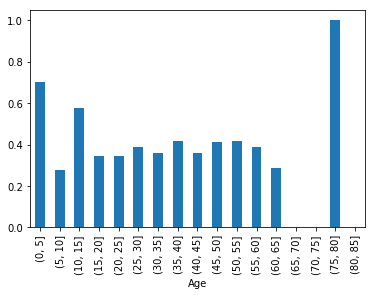

In [47]:
group_by_age = pd.cut(tr4Filled["Age"], np.arange(0, 90, 5))
age_grouping = tr4Filled.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

In [48]:
#using this to decipher the graph better
#only one person who is that was older than 65 who survived so that is getting grouped in
#10-15 seems like a bit of an outlier and it would match pretty well when the mean is taken from 5 to 20
#20-60 is similar to 5-20 so that could be one group but I'm just going to separate it
#60-85 is lower so that is why I am grouping it separately
grouptest=tr4Filled[tr4Filled['Age']<60]
grouptest=grouptest[grouptest['Age']>20]
grouptest['Survived'].mean()

0.373134328358209

This is to match it up to the same format as data clean 1, not sure if that is the goal

tr4Filled=pd.get_dummies(tr4Filled,columns=['Sex'])
tr4Filled.drop(['Sex_male','SibSp', 'Parch'],axis=1,inplace=True)

tr4Filled['Age']=np.where(tr4Filled['Age'].between(0,5),0,tr4Filled['Age'])
tr4Filled['Age']=np.where(tr4Filled['Age'].between(5,20),1,tr4Filled['Age'])
tr4Filled['Age']=np.where(tr4Filled['Age'].between(20,60),2,tr4Filled['Age'])
tr4Filled['Age']=np.where(tr4Filled['Age'].between(60,85),3,tr4Filled['Age'])
tr4Filled=pd.get_dummies(tr4Filled,columns=['Age'])

# 3rd cleaning if attempting
Not splitting by age in the two large groups since that would actually not make sense for the null values that share the characteristics. Try filling in the na values with the average of title in each of the two large groups.